<a href="https://colab.research.google.com/github/Ganushkevych/Gold_BTC_Correlation/blob/main/Gold_BTC_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing required libraries

In [113]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Geting Bitcoin and Gold prices from 2014-09-17 to present

In [114]:
start_date = "2014-09-17"
interval = '1d'
btc = yf.download("BTC-USD", start=start_date, interval=interval)
gold = yf.download("GC=F", start=start_date, interval=interval)

/tmp/ipython-input-2257971060.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start=start_date, interval=interval)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2257971060.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold = yf.download("GC=F", start=start_date, interval=interval)
[*********************100%***********************]  1 of 1 completed


###Analyzing data

In [115]:
def show_basic_info(data, sep='\n\n'):
  print(data.info(), data.info, data.describe(), sep=sep)

In [116]:
show_basic_info(btc)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4030 entries, 2014-09-17 to 2025-09-28
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   4030 non-null   float64
 1   (High, BTC-USD)    4030 non-null   float64
 2   (Low, BTC-USD)     4030 non-null   float64
 3   (Open, BTC-USD)    4030 non-null   float64
 4   (Volume, BTC-USD)  4030 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 188.9 KB
None

<bound method DataFrame.info of Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2014-09-17     457.334015     468.174011     452.421997     465.864014   
2014-09-18     424.440002     456.859985     413.104004     456.859985   
2014-09-19     394.795990     427.834991     384.532013     424.102997   
2014-0

In [117]:
show_basic_info(gold)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2774 entries, 2014-09-17 to 2025-09-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GC=F)   2774 non-null   float64
 1   (High, GC=F)    2774 non-null   float64
 2   (Low, GC=F)     2774 non-null   float64
 3   (Open, GC=F)    2774 non-null   float64
 4   (Volume, GC=F)  2774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 130.0 KB
None

<bound method DataFrame.info of Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2014-09-17  1234.400024  1236.199951  1221.900024  1236.199951     10
2014-09-18  1225.699951  1225.699951  1216.199951  1216.199951      5
2014-09-19  1215.300049  1218.300049  1215.300049  1218.300049      4
2014-09-22  1216.800049  1216.800049  1212.400024  

###Validating data

In [118]:
gold_close_price = gold['Close']
btc_close_prise = btc['Close']
data = pd.concat([gold_close_price, btc_close_prise], axis=1).dropna()

###Correlation and line of best fit function

In [119]:
def correlation_and_line_of_best_fit(data, column1, column2):
    data.plot(kind='scatter', x=column1, y=column2)
    line_of_best_fit = np.poly1d(np.polyfit(x=data[column1], y=data[column2], deg=1))
    plt.plot(data[column1], line_of_best_fit(data[column1]), 'r')
    print(data.corr())
    plt.show()

###Rolling Correlation function

In [120]:
def rolling_correlation(data1, data2, period):
  return data1.rolling(period, center=True).corr(data2)

###Visualization function

In [121]:
def visualization(gold_data, btc_data, corr_data, threshold, log_y_scale=False):
    moderate_or_higher_corr = corr_data[corr_data.abs() >= threshold]
    positive_corr = moderate_or_higher_corr[corr_data > 0]
    negative_corr = moderate_or_higher_corr[corr_data < 0]
    no_correlation = corr_data[corr_data.abs() <= threshold]

    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

    gold_data.plot(ax=axes[0], title='Gold Price (GC=F)', color='#cc4433', legend=False)
    btc_data.plot(ax=axes[1], title='Bitcoin Price (BTC-USD)', color='#4444bb', legend=False)

    axes[2].scatter(
        positive_corr.index,
        positive_corr.values,
        s=3,
        c='#55aa55',
    )
    axes[2].scatter(
        no_correlation.index,
        no_correlation.values,
        s=3,
        c='#aaaaaa',
    )
    axes[2].scatter(
        negative_corr.index,
        negative_corr.values,
        s=3,
        c='#bb4444',
    )
    axes[2].set_title('Year Rolling Correlation')

    events = {
        # "2017-12-17": "BTC ATH 20k",
        # "2020-03-12": "COVID Crash",
        # "2020-05-11": "Halving",
        # "2021-11-10": "BTC ATH 69k",
        # "2022-05-09": "LUNA Crash",
        # "2023-03-10": "Banking crisis"
    }

    for ax in axes:
        ax.minorticks_on()
        ax.grid(True, which='major', alpha=0.5, linewidth=0.6)
        ax.grid(True, which='minor', alpha=0.4, color='#cccccc', linewidth=0.5)
        if(log_y_scale & (ax != axes[2])):
            ax.set_yscale('log')
            ax.minorticks_off()
        for date in events.keys():
            ax.axvline(pd.to_datetime(date), color='#8822ff', alpha=0.5)
    for date, event in events.items():
        axes[0].text(x=pd.to_datetime(date),
                    y=axes[0].get_ylim()[1],
                    s=event,
                    rotation=90,
                    fontsize=8,
                    color="red",
                    ha='left',
                    va='top',
        )

    axes[2].axhline(threshold,  color='red', linestyle='--', alpha=0.4, linewidth='2')
    axes[2].axhline(-threshold,  color='red', linestyle='--', alpha=0.4, linewidth='2')
    plt.tight_layout()
    plt.show()

###Visualizing raw price correlation

Ticker       GC=F   BTC-USD
Ticker                     
GC=F     1.000000  0.933097
BTC-USD  0.933097  1.000000


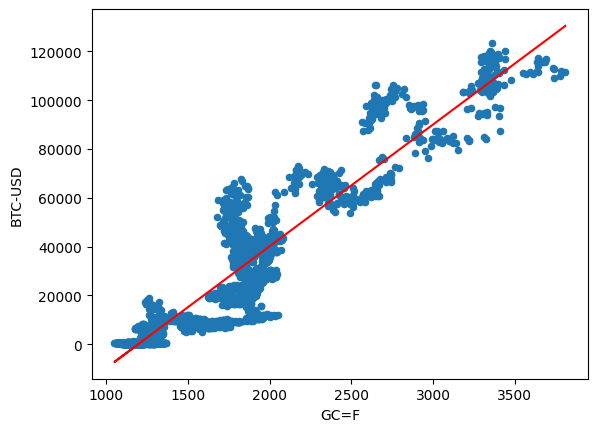

In [122]:
correlation_and_line_of_best_fit(data, 'GC=F', 'BTC-USD')

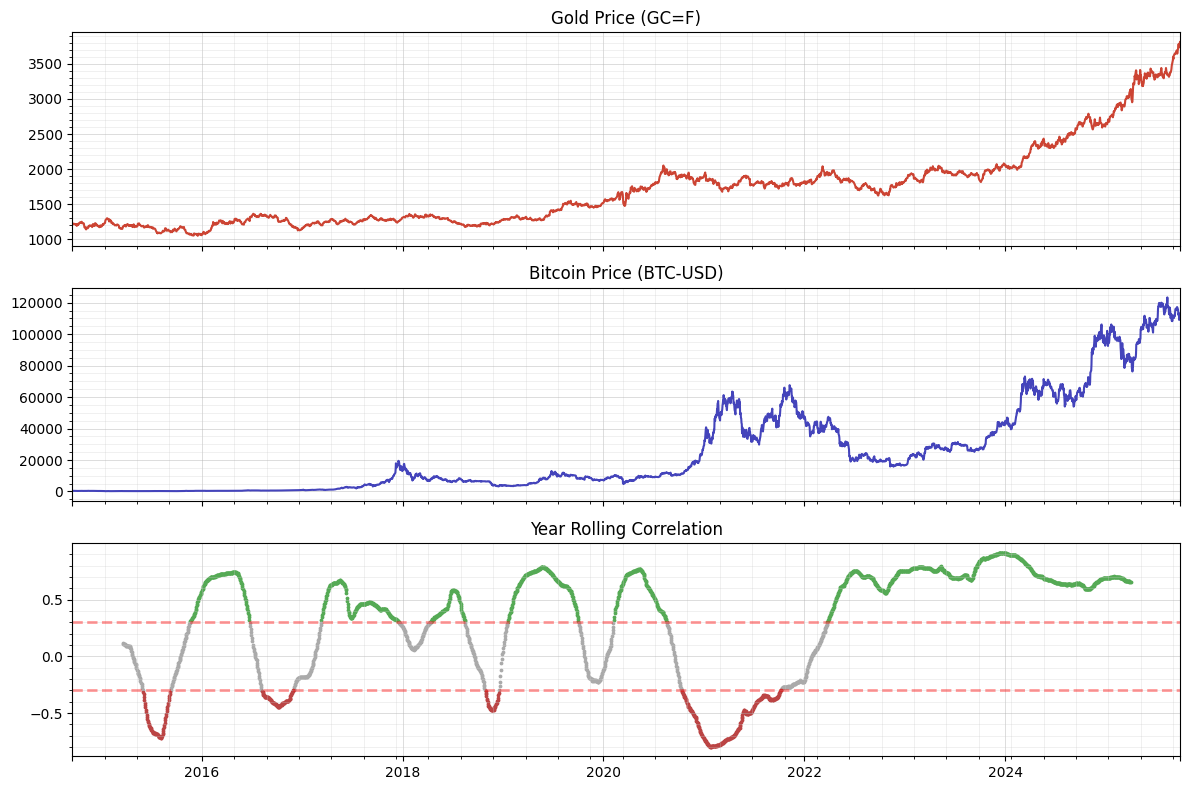

In [123]:
rolling_corr = rolling_correlation(data['GC=F'], data['BTC-USD'], 252)
visualization(gold_close_price, btc_close_prise, rolling_corr, 0.3)

####This basicly shows that btc and gold both have uptrend so this correlation isn't relevant

###Visualization raw price correlation(the same as previous but ploting btc and gold in log form that better shows their price changing)

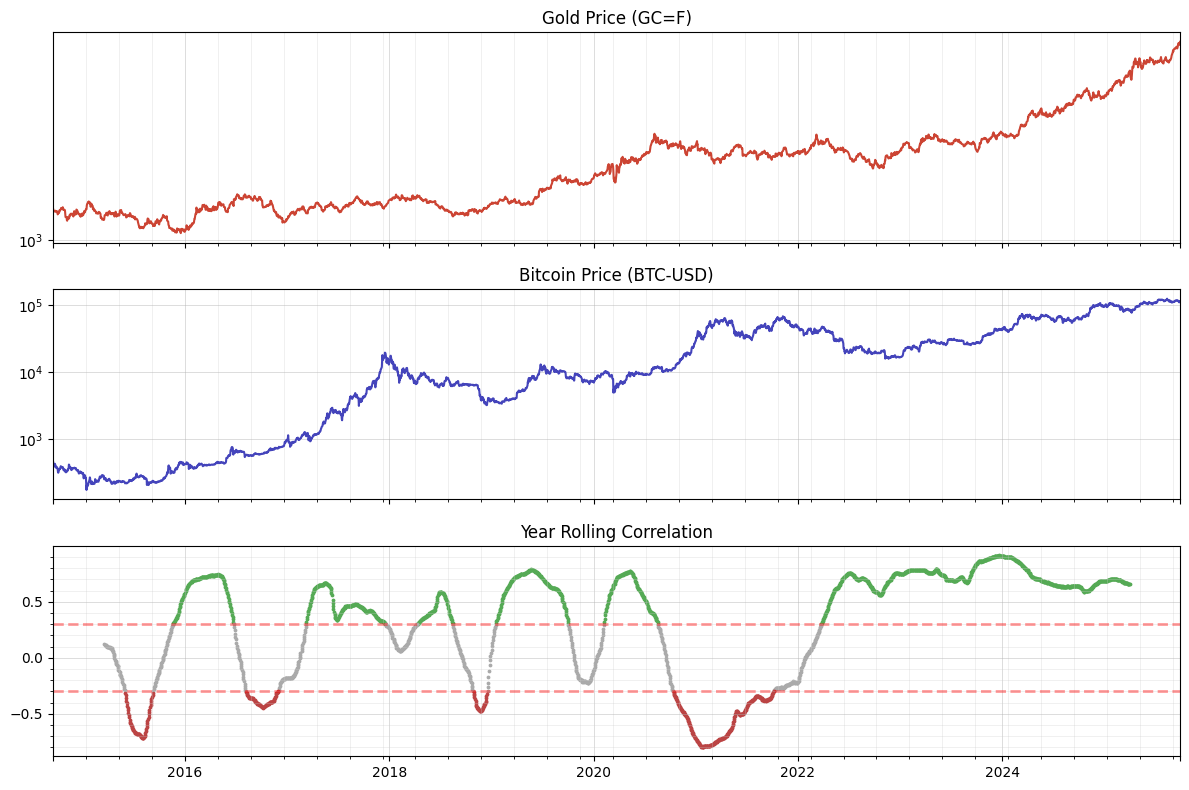

In [124]:
visualization(gold_close_price, btc_close_prise, rolling_corr, 0.3, True)

###Calculation daily returns instead of close prise

In [125]:
daily_return = data.pct_change().dropna()

###Visualizing daily return correlation

Ticker       GC=F   BTC-USD
Ticker                     
GC=F     1.000000  0.078123
BTC-USD  0.078123  1.000000


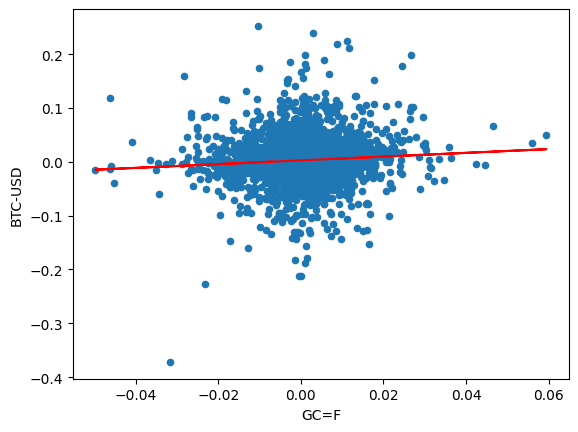

In [126]:
correlation_and_line_of_best_fit(daily_return, 'GC=F', 'BTC-USD')

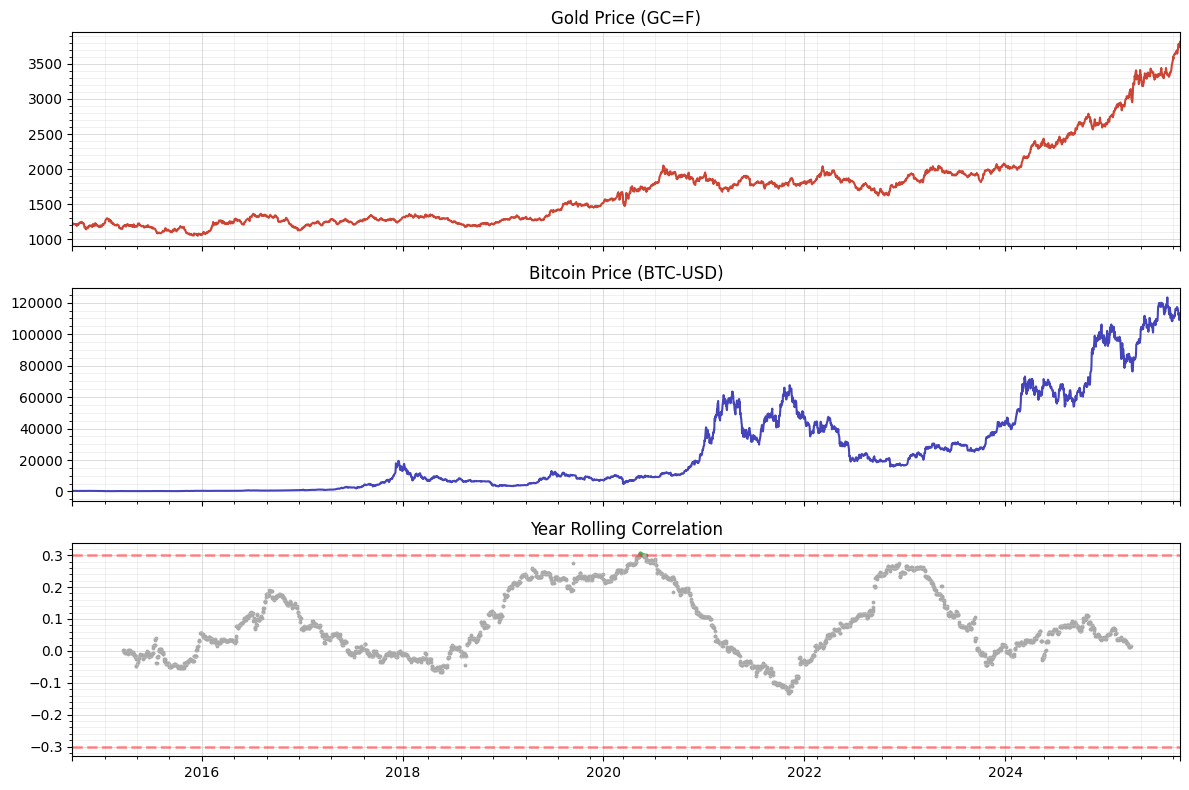

In [127]:
rolling_corr = rolling_correlation(daily_return['GC=F'], daily_return['BTC-USD'], 252)
visualization(gold_close_price, btc_close_prise, rolling_corr, 0.3)

###Calculating weekly return

In [128]:
weekly_returns = data.resample('W-FRI').last().pct_change().dropna()

###Visualizing weekly return correlation

Ticker      GC=F  BTC-USD
Ticker                   
GC=F     1.00000  0.08116
BTC-USD  0.08116  1.00000


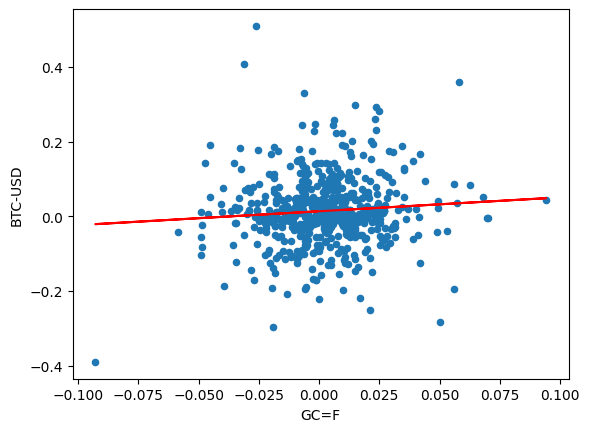

In [129]:
correlation_and_line_of_best_fit(weekly_returns, 'GC=F', 'BTC-USD')

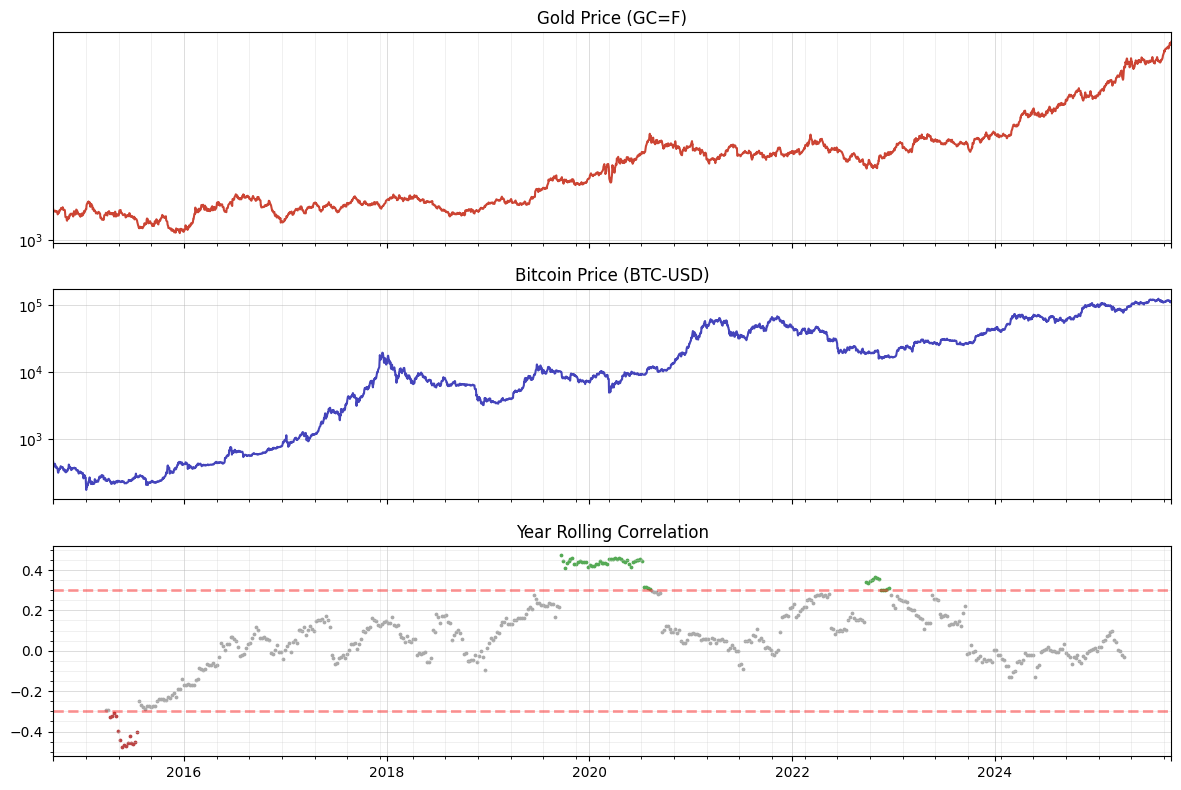

In [130]:
rolling_corr = rolling_correlation(weekly_returns['GC=F'], weekly_returns['BTC-USD'], 52)
visualization(gold_close_price, btc_close_prise, rolling_corr, 0.3, True)